In [1]:
using QuantumOptics
using PyPlot

/home/hhs/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [13]:
N = 200
b = NLevelBasis(N)
t = 1
Htb = SparseOperator(b)
for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)
Htb += Htb'

Operator(dim=200x200)
  basis: NLevel(N=200)sparse([2, 200, 1, 3, 2, 4, 3, 5, 4, 6  …  195, 197, 196, 198, 197, 199, 198, 200, 1, 199], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  196, 196, 197, 197, 198, 198, 199, 199, 200, 200], ComplexF64[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im  …  -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im], 200, 200)

In [14]:
Nparticles = 1
b_mb = ManyBodyBasis(b, bosonstates(b, Nparticles))

ManyBody(onebodybasis=NLevel(N=200), states:200)

In [15]:
b_mb.occupations

200-element QuantumOpticsBase.SortedVector{Vector{Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}:
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0,

In [16]:
H_mb = manybodyoperator(b_mb, Htb)
Eb, Ub = eigenstates(dense(H_mb));
Eb

200-element Vector{Float64}:
 -1.9999999999999993
 -1.9990131207314625
 -1.9990131207314623
 -1.9960534568565431
 -1.9960534568565418
 -1.991123929206159
 -1.9911239292061587
 -1.9842294026289546
 -1.9842294026289542
 -1.975376681190275
 -1.9753766811902738
 -1.9645745014573768
 -1.9645745014573759
  ⋮
  1.9645745014573774
  1.9753766811902753
  1.9753766811902755
  1.9842294026289555
  1.9842294026289558
  1.99112392920616
  1.99112392920616
  1.9960534568565431
  1.9960534568565431
  1.999013120731463
  1.9990131207314632
  2.0

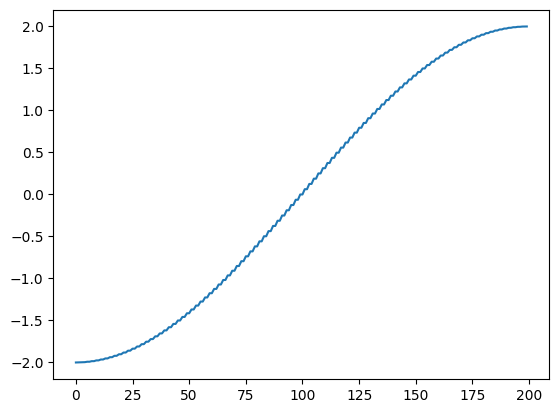

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fcf9a207400>

In [17]:
plot(Eb)